In [ ]:
!pip install colorthief -q
from colorthief import ColorThief

In [ ]:
from sklearn.cluster import KMeans
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from collections import Counter
import webcolors
from math import sqrt

In [ ]:
def closest_colour(requested_colour):
    differences = {}
    for color_hex, color_name in webcolors.CSS3_HEX_TO_NAMES.items():
        r, g, b = webcolors.hex_to_rgb(color_hex)
        rd = (r - requested_colour[0]) ** 2
        gd = (g - requested_colour[1]) ** 2
        bd = (b - requested_colour[2]) ** 2
        differences[sum([rd,gd,bd])] = color_name
    return differences[min(differences.keys())]

def get_colour_name(requested_colour):
    try:
        color_name = webcolors.rgb_to_name(requested_colour)
    except ValueError:
        color_name = closest_colour(requested_colour)
    return color_name

In [ ]:
color_names = [
    'black', 'navy', 'darkblue', 'mediumblue', 'blue', 'darkgreen', 'green', 'teal', 'darkcyan', 'deepskyblue',
    'darkturquoise', 'mediumspringgreen', 'lime', 'springgreen', 'cyan', 'midnightblue', 'dodgerblue', 'lightseagreen',
    'forestgreen', 'seagreen', 'darkslategray', 'limegreen', 'mediumseagreen', 'turquoise', 'royalblue', 'steelblue',
    'darkslateblue', 'mediumturquoise', 'indigo', 'darkolivegreen', 'cadetblue', 'cornflowerblue', 'mediumaquamarine',
    'dimgray', 'slateblue', 'olivedrab', 'slategray', 'lightslategray', 'mediumslateblue', 'lawngreen', 'chartreuse',
    'aquamarine', 'maroon', 'purple', 'olive', 'gray', 'skyblue', 'lightskyblue', 'blueviolet', 'darkred', 'darkmagenta',
    'saddlebrown', 'darkseagreen', 'lightgreen', 'mediumpurple', 'darkviolet', 'palegreen', 'darkorchid', 'yellowgreen',
    'sienna', 'brown', 'darkgray', 'lightblue', 'greenyellow', 'paleturquoise', 'lightsteelblue', 'powderblue',
    'firebrick', 'darkgoldenrod', 'mediumorchid', 'rosybrown', 'darkkhaki', 'silver', 'mediumvioletred', 'indianred',
    'peru', 'chocolate', 'tan', 'lightgray', 'thistle', 'orchid', 'goldenrod', 'palevioletred', 'crimson', 'gainsboro',
    'plum', 'burlywood', 'lightcyan', 'lavender', 'darksalmon', 'violet', 'palegoldenrod', 'lightcoral', 'khaki',
    'aliceblue', 'honeydew', 'azure', 'sandybrown', 'wheat', 'beige', 'whitesmoke', 'mintcream', 'ghostwhite', 'salmon',
    'antiquewhite', 'linen', 'lightgoldenrodyellow', 'oldlace', 'red', 'magenta', 'deeppink', 'orangered', 'tomato',
    'hotpink', 'coral', 'darkorange', 'lightsalmon', 'orange', 'lightpink', 'pink', 'gold', 'peachpuff', 'navajowhite',
    'moccasin', 'bisque', 'mistyrose', 'blanchedalmond', 'papayawhip', 'lavenderblush', 'seashell', 'cornsilk',
    'lemonchiffon', 'floralwhite', 'snow', 'yellow', 'lightyellow', 'ivory', 'white'
]

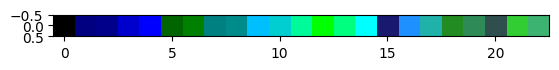

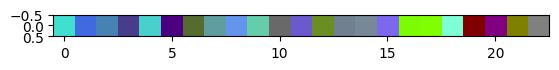

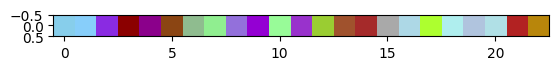

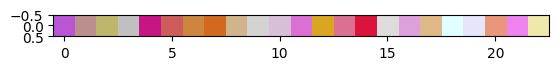

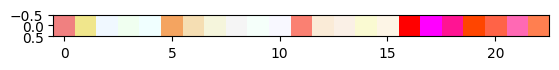

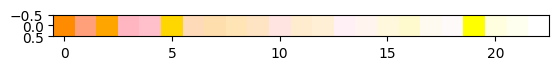

In [ ]:
curr = 0
for i in range(1, 7):
  plt.imshow([[webcolors.name_to_rgb(color) for color in color_names[curr:curr+23]]])
  plt.show()
  curr += 23

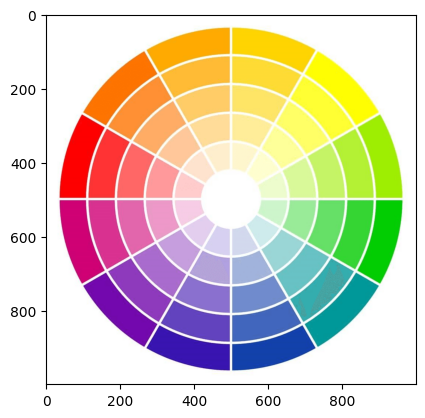

In [ ]:
color_dict = {
    'red': (255, 51, 52),
    'red-orange': (255, 144, 52),
    'orange': (255, 165, 0),
    'yellow-orange': (255, 219, 52),
    'yellow': (255, 255, 51),
    'yellow-green': (180, 241, 52),
    'green': (53, 213, 51),
    'blue-green': (52, 173, 174),
    'blue': (65, 102, 189),
    'blue-purple': (98, 67, 190),
    'purple': (142, 58, 188),
    'red-purple': (217, 49, 144)
}

plt.imshow(Image.open("/content/color.png"))

In [ ]:
rule_base = {0: [], 1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: [], 8: [], 9: [], 10: [], 11: []}

color_centers = list(color_dict.values())

def get_distance(color1, color2):
    return sum([(c1-c2)**2 for c1, c2 in zip(color1, color2)])

def get_cluster(color):
    prev = np.inf
    cluster = 0
    count = 0
    for key, rgb_center in color_dict.items():
      curr = get_distance(rgb_center, color)
      if(prev > curr):
        cluster = count
        prev = curr
      count += 1
    return cluster

def get_rule_base():
    for color in color_names:
      cluster = get_cluster(webcolors.name_to_rgb(color))
      rule_base[cluster] = rule_base[cluster]+[color]
    return rule_base

red


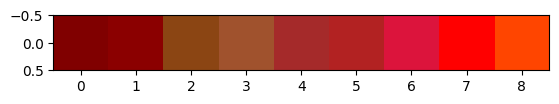

red-orange


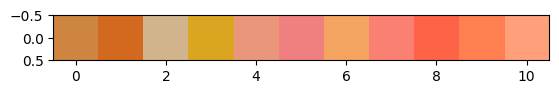

orange


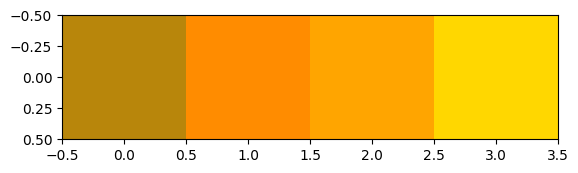

yellow-orange


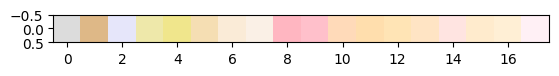

yellow


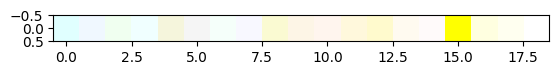

yellow-green


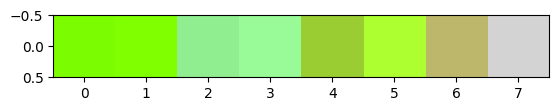

green


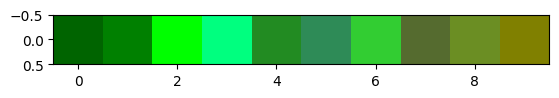

blue-green


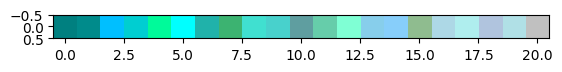

blue


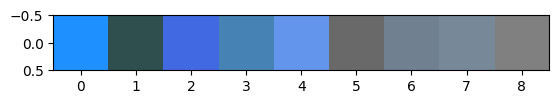

blue-purple


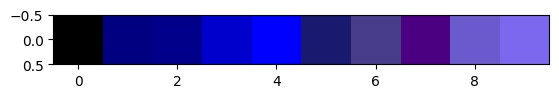

purple


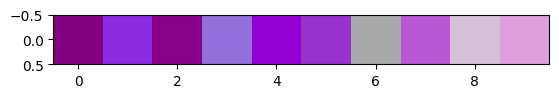

red-purple


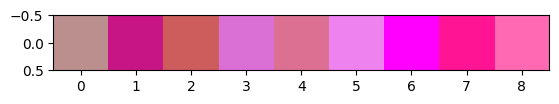

In [ ]:
rule_base = get_rule_base()
idx = 0
for key, values in rule_base.items():
  plt.imshow([[webcolors.name_to_rgb(color) for color in values]])
  print(list(color_dict.keys())[idx])
  idx+=1
  plt.show()

In [ ]:
import numpy as np
from numpy.linalg import norm
def get_cosine_distance(color1, color2):
  A = np.array(color1)
  B = np.array(color2)
  cosine = np.dot(A,B)/(norm(A)*norm(B))
  return cosine


def get_contrast_color(color, cluster):
  root_color = list(color_dict.values())[cluster]
  contrast_cluster = (cluster+6)%12
  print(contrast_cluster)
  contrast_color = list(color_dict.values())[contrast_cluster]
  prev = np.inf
  cluster = []
  dic = {}
  for i in rule_base[contrast_cluster]:
      dic[i] = get_cosine_distance(webcolors.name_to_rgb(i), contrast_color) - get_cosine_distance(webcolors.name_to_rgb(color), root_color)
  sorted_dic = dict(sorted(dic.items(), key=lambda x: x[1]))
  print(sorted_dic)
  return list(sorted_dic.keys())[:2]



In [ ]:
def suggest_color(color_arr):
    suggested_colors  = []
    for color in color_arr[:5]:
      cluster =  get_cluster(color)
      dic = {}
      for i in rule_base[cluster]:
        dic[i] = get_distance(webcolors.name_to_rgb(i), color)
      sorted_dic = dict(sorted(dic.items(), key=lambda x: x[1]))
      suggested_colors += list(sorted_dic.keys())[:2]
    suggested_colors += get_contrast_color(color_arr[0], get_cluster(webcolors.name_to_rgb(color_arr[0])))
    return suggested_colors

In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv("/content/furniture.csv")
df.head(10)

,product id,drive link,product link,category,color,material,support color,support material (metal/wooden),thumbnail image,length,breadth,height,price
0,bb01,bb01.glb,NaN,bean bag,NaN,velvet,NaN,velvet,bb01.jpg,90.0,90.0,90.0,NaN
1,bs01,bs01.glb,NaN,book shelf,NaN,wood,NaN,wood,bs01.jpg,120.0,320.0,140.0,6000.0
2,bs02,bs02.glb,NaN,bookshelf,NaN,wood,NaN,wood,bs02.jpg,120.0,320.0,140.0,NaN
3,ca01,ca01.glb,NaN,cabinet,NaN,plastic,NaN,plastic,ca01.jpg,36.0,24.0,40.0,10000.0
4,ca02,ca02.glb,NaN,cabinet,NaN,wood,NaN,wood,ca02.jpg,33.0,24.0,40.0,15000.0
5,ca03,ca03.glb,NaN,cabinet,NaN,wood,NaN,wood,ca03.jpg,33.0,24.0,40.0,12000.0
6,ch01,ch01.gltf,NaN,chair,darkslategray,NaN,NaN,NaN,ch01.jpg,30.0,30.0,30.0,5500.0
7,ch02,ch02.glb,NaN,chair,NaN,NaN,NaN,NaN,NaN,30.0,30.0,30.0,2000.0
8,ch03,ch03.glb,NaN,chair,lightgray,NaN,lightgray,NaN,ch03.jpg,30.0,30.0,30.0,5600.0
9,ch05,ch05.glb,NaN,chair,gainsboro,NaN,gainsboro,NaN,ch05.jpg,30.0,30.0,30.0,8529.0


In [ ]:
def filtering(category, colors_arr, length, breadth, height):
  filtered_by_category = df[df['category']==category]
  filtered_by_dim = filtered_by_category[(filtered_by_category['length'] < length) & (filtered_by_category['breadth'] < breadth) & (filtered_by_category['height'] < height)]
  new_df = pd.DataFrame()
  colors = suggest_color(colors_arr)
  plt.imshow([[webcolors.name_to_rgb(color) for color in colors]])
  plt.show()
  for color in colors:
    temp = filtered_by_dim[(filtered_by_dim['color']==color) | (filtered_by_dim['support color']==color)]
    new_df = pd.concat([new_df, temp], ignore_index=True)
  return new_df

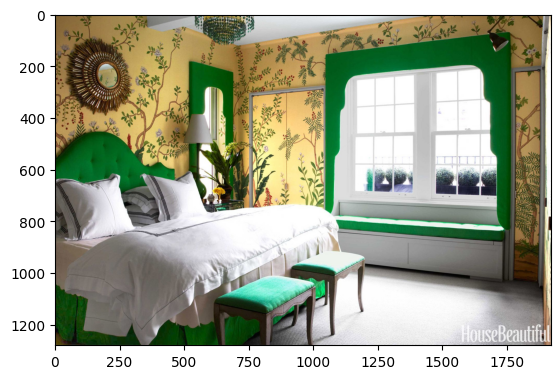

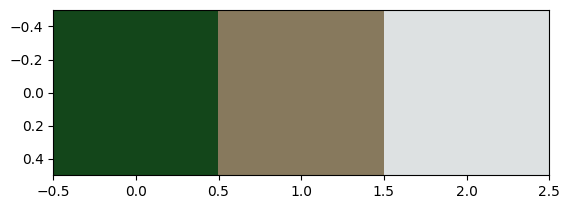

In [ ]:
image_path = '/content/green_yellow_bedroom.jpg'
image = Image.open(image_path)
plt.imshow(image)
plt.show()

# Create a ColorThief object
color_thief = ColorThief(image_path)
# Get a color palette
palette = color_thief.get_palette(color_count=10)
# Get Color Name Array
colors_arr1 = [get_colour_name(color) for color in palette]

plt.imshow([[palette[i] for i in range(3)]])
plt.show()

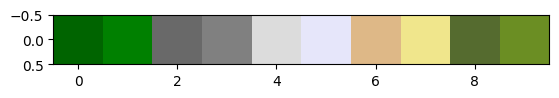

,product id,drive link,product link,category,color,material,support color,support material (metal/wooden),thumbnail image,length,breadth,height,price
0,so01,so01.glb,NaN,sofa,dimgray,NaN,NaN,NaN,so01.jpg,350.0,95.0,90.0,10000.0


In [ ]:
suggestions = filtering("sofa", colors_arr1, 1000, 1000, 1000)
suggestions

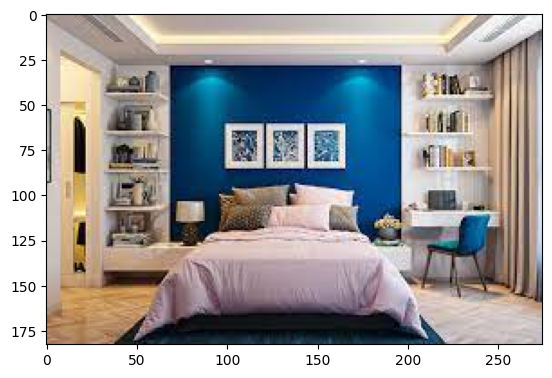

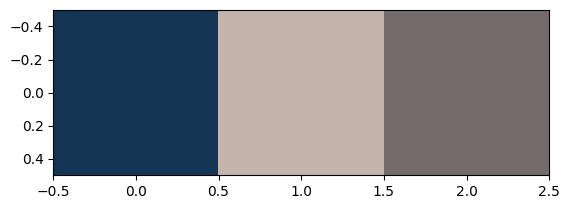

In [ ]:
image_path = '/content/blue_bedroom.jpeg'
image = Image.open(image_path)
plt.imshow(image)
plt.show()

# Create a ColorThief object
color_thief = ColorThief(image_path)
# Get a color palette
palette = color_thief.get_palette(color_count=10)

plt.imshow([[palette[i] for i in range(3)]])
plt.show()

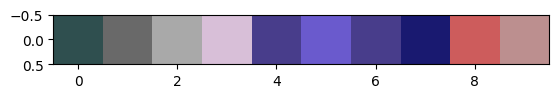

,product id,drive link,product link,category,color,material,support color,support material (metal/wooden),thumbnail image,length,breadth,height,price
0,so01,so01.glb,NaN,sofa,dimgray,NaN,NaN,NaN,so01.jpg,350.0,95.0,90.0,10000.0
1,so03,so03.glb,NaN,sofa,rosybrown,NaN,NaN,NaN,so03.jpg,350.0,95.0,90.0,5000.0


In [ ]:
suggestions = filtering("sofa", palette, 1000, 1000, 1000)
suggestions

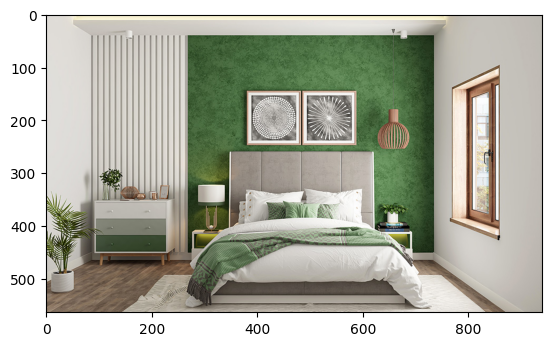

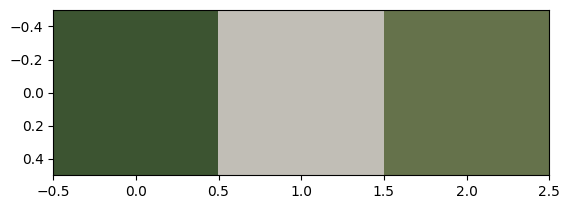

In [ ]:
image_path = '/content/green-bedroom.jpg'
image = Image.open(image_path)
plt.imshow(image)
plt.show()

# Create a ColorThief object
color_thief = ColorThief(image_path)
# Get a color palette
palette = color_thief.get_palette(color_count=10)
# Get Color Name Array
colors_arr3 = [get_colour_name(color) for color in palette]

plt.imshow([[palette[i] for i in range(3)]])
plt.show()

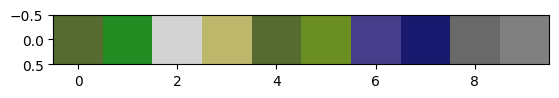

,product id,drive link,product link,category,color,material,support color,support material (metal/wooden),thumbnail image,length,breadth,height,price
0,so01,so01.glb,NaN,sofa,dimgray,NaN,NaN,NaN,so01.jpg,350.0,95.0,90.0,10000.0


In [ ]:
suggestions = filtering("sofa", palette, 1000, 1000, 1000)
suggestions